<a href="https://colab.research.google.com/github/jatinkchaudhary/Speech-Processing-Final-Year-Project-/blob/main/SVM--RandomForest--LogisticRegression--KNN_mfcc_iemocap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
k = pd.read_csv('/content/drive/MyDrive/mfcc_iemocap/folder1/mfcc (2).csv')

In [ ]:
k.columns

Index(['mel_spectrogram', 'gender', 'emotion'], dtype='object')

In [ ]:
y = k.drop(columns={'gender','emotion'})

In [ ]:
y.mel_spectrogram.replace('[','')

0       [-6.9798419e+02  5.5228489e+01  3.2386321e-01 ...
1       [-6.8523792e+02  5.6236694e+01  2.4531119e+00 ...
2       [-6.9740387e+02  6.5513802e+01  5.2535695e-01 ...
3       [-7.0755347e+02  6.7097733e+01  1.9093652e+00 ...
4       [-7.2731793e+02  6.2764400e+01  2.7512746e+00 ...
                              ...                        
1435    [-6.79587769e+02  3.07080517e+01 -3.11348534e+...
1436    [-5.1100708e+02  3.1945696e+01 -2.4223425e+01 ...
1437    [-5.8676270e+02  2.5372396e+01 -1.7824156e+01 ...
1438    [-6.0911829e+02  5.4886749e+01 -1.1289345e+01 ...
1439    [-4.9298596e+02  2.4425610e+01 -6.5657177e+00 ...
Name: mel_spectrogram, Length: 1440, dtype: object

In [ ]:
y['mel_spectrogram'] =  y['mel_spectrogram'].apply(lambda x: x.replace('[','').replace(']','')) 
y

,mel_spectrogram
0,-6.9798419e+02 5.5228489e+01 3.2386321e-01 ...
1,-6.8523792e+02 5.6236694e+01 2.4531119e+00 ...
2,-6.9740387e+02 6.5513802e+01 5.2535695e-01 ...
3,-7.0755347e+02 6.7097733e+01 1.9093652e+00 ...
4,-7.2731793e+02 6.2764400e+01 2.7512746e+00 ...
...,...
1435,-6.79587769e+02 3.07080517e+01 -3.11348534e+0...
1436,-5.1100708e+02 3.1945696e+01 -2.4223425e+01 -...
1437,-5.8676270e+02 2.5372396e+01 -1.7824156e+01 -...
1438,-6.0911829e+02 5.4886749e+01 -1.1289345e+01 -...


In [ ]:
y.replace('\s+', ', ',regex=True,inplace=True)
y

,mel_spectrogram
0,"-6.9798419e+02, 5.5228489e+01, 3.2386321e-01, ..."
1,"-6.8523792e+02, 5.6236694e+01, 2.4531119e+00, ..."
2,"-6.9740387e+02, 6.5513802e+01, 5.2535695e-01, ..."
3,"-7.0755347e+02, 6.7097733e+01, 1.9093652e+00, ..."
4,"-7.2731793e+02, 6.2764400e+01, 2.7512746e+00, ..."
...,...
1435,"-6.79587769e+02, 3.07080517e+01, -3.11348534e+..."
1436,"-5.1100708e+02, 3.1945696e+01, -2.4223425e+01,..."
1437,"-5.8676270e+02, 2.5372396e+01, -1.7824156e+01,..."
1438,"-6.0911829e+02, 5.4886749e+01, -1.1289345e+01,..."


In [ ]:
y.to_csv('comma_mfcc.csv', index=False)

In [ ]:
y['mel_spectrogram']

0       -6.9798419e+02, 5.5228489e+01, 3.2386321e-01, ...
1       -6.8523792e+02, 5.6236694e+01, 2.4531119e+00, ...
2       -6.9740387e+02, 6.5513802e+01, 5.2535695e-01, ...
3       -7.0755347e+02, 6.7097733e+01, 1.9093652e+00, ...
4       -7.2731793e+02, 6.2764400e+01, 2.7512746e+00, ...
                              ...                        
1435    -6.79587769e+02, 3.07080517e+01, -3.11348534e+...
1436    -5.1100708e+02, 3.1945696e+01, -2.4223425e+01,...
1437    -5.8676270e+02, 2.5372396e+01, -1.7824156e+01,...
1438    -6.0911829e+02, 5.4886749e+01, -1.1289345e+01,...
1439    -4.9298596e+02, 2.4425610e+01, -6.5657177e+00,...
Name: mel_spectrogram, Length: 1440, dtype: object

In [ ]:
y = y.mel_spectrogram.str.split(', ', expand=True)

In [ ]:
y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,-6.9798419e+02,5.5228489e+01,3.2386321e-01,1.2775377e+01,7.3961482e+00,8.6622393e-01,-3.5502758e+00,-2.8283315e+00,-1.1305533e+01,-2.5249267e+00,4.9610442e-01,-2.7229269e+00,1.6458002e+00,-3.4319642e+00,1.4035642e-01,1.0731595e+00,-4.3556719e+00,-1.5837712e+00,-1.5930088e+00,-6.5936118e-01,-6.2007332e+00,-2.6033115e-01,-2.5739810e+00,-4.2953477e+00,-1.8979306e+00,-6.0985529e-01,-5.0588140e+00,4.4614440e-01,-2.3297389e+00,3.1653264e-01,-2.1978137e+00,-1.9670634e+00,-2.8553901e+00,-1.7034268e+00,-3.3283739e+00,-1.4314876e+00,-1.1954836e+00,-1.6748068e+00,-3.5871463e+00,-1.4610063e+00,None
1,-6.8523792e+02,5.6236694e+01,2.4531119e+00,1.3566656e+01,6.7019486e+00,3.3414934e+00,-1.8950526e+00,-6.6738167e+00,-1.0671633e+01,-2.9463198e+00,8.9564365e-01,-1.2035998e+00,2.4656934e-01,-2.4638908e+00,-1.4349358e+00,2.1335149e+00,-4.6477289e+00,-1.7609535e+00,-3.5699654e-01,-3.6547402e-01,-5.0561161e+00,-1.6381640e+00,-1.5605128e+00,-2.4521663e+00,-2.2845421e+00,-7.8173423e-01,-4.3559151e+00,1.7442434e-01,-2.3411069e+00,6.4811862e-01,-2.5844476e+00,-2.0109067e+00,-3.0067041e+00,-2.6492500e+00,-3.3616326e+00,-1.3579652e+00,-1.0570942e+00,-2.3738570e+00,-3.5160027e+00,-3.3112552e+00,None
2,-6.9740387e+02,6.5513802e+01,5.2535695e-01,1.4038121e+01,5.5549488e+00,3.2954519e+00,-1.7407448e+00,-4.3807549e+00,-9.0626993e+00,-4.1661587e+00,1.5895821e+00,-1.2514737e+00,1.0580020e+00,-4.1501746e+00,1.1301674e+00,4.6685109e-01,-6.6261725e+00,-2.3131268e+00,-3.9500296e-01,-1.4120905e+00,-6.1908312e+00,-1.2006195e+00,-2.5770416e+00,-2.9790657e+00,-2.5925155e+00,-7.9889566e-01,-5.6606178e+00,1.1277118e+00,-4.0506883e+00,9.5491774e-02,-3.3360758e+00,-1.5693877e+00,-2.7226603e+00,-2.9544261e+00,-4.3675385e+00,-1.8923067e+00,-2.2947102e+00,-2.1967282e+00,-4.8632932e+00,-2.7784650e+00,None
3,-7.0755347e+02,6.7097733e+01,1.9093652e+00,1.1530989e+01,9.3996611e+00,1.4150268e+00,-4.7648563e+00,-4.3333335e+00,-8.6452179e+00,-4.4728966e+00,1.4295208e+00,-2.0484025e+00,-5.1856047e-01,-3.1548305e+00,-1.8742191e+00,1.4090912e+00,-5.1946058e+00,-1.8799142e+00,-1.0601617e+00,-1.1548043e+00,-4.8555923e+00,-1.5210236e+00,-2.7991974e+00,-4.0423794e+00,-2.3352559e+00,-1.1631902e+00,-4.6120949e+00,4.7706324e-01,-3.0318828e+00,3.7176958e-01,-3.5203993e+00,-2.1903224e+00,-3.5133522e+00,-3.3116930e+00,-3.8622816e+00,-1.1532983e+00,-2.1930635e+00,-2.9918578e+00,-4.3419428e+00,-4.0247397e+00,None
4,-7.2731793e+02,6.2764400e+01,2.7512746e+00,1.5473256e+01,7.7631149e+00,2.3307145e+00,-3.6416821e+00,-3.3673439e+00,-1.0113077e+01,-4.4700847e+00,6.3989449e-01,-2.7456565e+00,1.9821934e-01,-2.9337635e+00,-7.5060749e-01,1.9241780e+00,-5.7906141e+00,-3.9663613e-01,-1.5093627e+00,-1.2271512e+00,-4.9525418e+00,-1.0200223e+00,-3.0144513e+00,-4.0261531e+00,-1.9851797e+00,-9.3536448e-01,-5.0591083e+00,1.5879375e+00,-3.2787819e+00,7.5102711e-01,-2.2820213e+00,-1.0224488e+00,-2.0789447e+00,-2.2667372e+00,-1.9159797e+00,-2.8257185e-01,-1.9160509e+00,-1.6066085e+00,-3.9609735e+00,-2.6183624e+00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-6.79587769e+02,3.07080517e+01,-3.11348534e+00,1.05109584e+00,-8.27828884e+00,-4.65299559e+00,-8.28769112e+00,-7.90353727e+00,-7.49848986e+00,-6.14778566e+00,-7.27204943e+00,-4.55153751e+00,-8.63292313e+00,-2.96946764e+00,-2.65458679e+00,-3.66568446e+00,-2.71265316e+00,1.57608879e+00,1.00212550e+00,3.05134201e+00,1.44913483e+00,4.59542334e-01,4.39616174e-01,1.40600646e+00,7.14392602e-01,3.40821338e+00,1.10787235e-01,1.68952096e+00,-8.61118674e-01,6.60412759e-02,-5.21173477e-01,8.22182775e-01,-2.07069784e-01,6.07889056e-01,-1.89384007e+00,6.58500910e-01,-1.47576988e+00,-4.85634863e-01,-8.13816071e-01,-4.56358522e-01,None
1436,-5.1100708e+02,3.1945696e+01,-2.4223425e+01,-4.7899842e+00,-1.6094898e+01,-1.0941045e+01,-1.5406

In [ ]:
n=np.array(y)
t=n[:,0:40]
t

array([['-6.9798419e+02', '5.5228489e+01', '3.2386321e-01', ...,
        '-1.6748068e+00', '-3.5871463e+00', '-1.4610063e+00'],
       ['-6.8523792e+02', '5.6236694e+01', '2.4531119e+00', ...,
        '-2.3738570e+00', '-3.5160027e+00', '-3.3112552e+00'],
       ['-6.9740387e+02', '6.5513802e+01', '5.2535695e-01', ...,
        '-2.1967282e+00', '-4.8632932e+00', '-2.7784650e+00'],
       ...,
       ['-5.8676270e+02', '2.5372396e+01', '-1.7824156e+01', ...,
        '-2.1649948e-01', '-1.0952753e+00', '4.5922223e-01'],
       ['-6.0911829e+02', '5.4886749e+01', '-1.1289345e+01', ...,
        '1.3964534e-01', '-1.3192052e+00', '-7.4131900e-01'],
       ['-4.9298596e+02', '2.4425610e+01', '-6.5657177e+00', ...,
        '1.0887842e+00', '-1.5899568e+00', '1.5747949e+00']], dtype=object)

In [ ]:
p=pd.DataFrame(t)

In [ ]:
p.to_csv('mfcc_iemocap.csv', index=False)

In [ ]:
l = pd.read_csv('/content/mfcc_iemocap.csv')
l

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-697.984190,55.228489,0.323863,12.775377,7.396148,0.866224,-3.550276,-2.828331,-11.305533,-2.524927,0.496104,-2.722927,1.645800,-3.431964,0.140356,1.073160,-4.355672,-1.583771,-1.593009,-0.659361,-6.200733,-0.260331,-2.573981,-4.295348,-1.897931,-0.609855,-5.058814,0.446144,-2.329739,0.316533,-2.197814,-1.967063,-2.855390,-1.703427,-3.328374,-1.431488,-1.195484,-1.674807,-3.587146,-1.461006
1,-685.237920,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895053,-6.673817,-10.671633,-2.946320,0.895644,-1.203600,0.246569,-2.463891,-1.434936,2.133515,-4.647729,-1.760954,-0.356997,-0.365474,-5.056116,-1.638164,-1.560513,-2.452166,-2.284542,-0.781734,-4.355915,0.174424,-2.341107,0.648119,-2.584448,-2.010907,-3.006704,-2.649250,-3.361633,-1.357965,-1.057094,-2.373857,-3.516003,-3.311255
2,-697.403870,65.513802,0.525357,14.038121,5.554949,3.295452,-1.740745,-4.380755,-9.062699,-4.166159,1.589582,-1.251474,1.058002,-4.150175,1.130167,0.466851,-6.626173,-2.313127,-0.395003,-1.412091,-6.190831,-1.200619,-2.577042,-2.979066,-2.592515,-0.798896,-5.660618,1.127712,-4.050688,0.095492,-3.336076,-1.569388,-2.722660,-2.954426,-4.367539,-1.892307,-2.294710,-2.196728,-4.863293,-2.778465
3,-707.553470,67.097733,1.909365,11.530989,9.399661,1.415027,-4.764856,-4.333334,-8.645218,-4.472897,1.429521,-2.048403,-0.518560,-3.154831,-1.874219,1.409091,-5.194606,-1.879914,-1.060162,-1.154804,-4.855592,-1.521024,-2.799197,-4.042379,-2.335256,-1.163190,-4.612095,0.477063,-3.031883,0.371770,-3.520399,-2.190322,-3.513352,-3.311693,-3.862282,-1.153298,-2.193064,-2.991858,-4.341943,-4.024740
4,-727.317930,62.764400,2.751275,15.473256,7.763115,2.330715,-3.641682,-3.367344,-10.113077,-4.470085,0.639894,-2.745656,0.198219,-2.933763,-0.750607,1.924178,-5.790614,-0.396636,-1.509363,-1.227151,-4.952542,-1.020022,-3.014451,-4.026153,-1.985180,-0.935364,-5.059108,1.587938,-3.278782,0.751027,-2.282021,-1.022449,-2.078945,-2.266737,-1.915980,-0.282572,-1.916051,-1.606608,-3.960974,-2.618362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-679.587769,30.708052,-3.113485,1.051096,-8.278289,-4.652996,-8.287691,-7.903537,-7.498490,-6.147786,-7.272049,-4.551538,-8.632923,-2.969468,-2.654587,-3.665684,-2.712653,1.576089,1.002126,3.051342,1.449135,0.459542,0.439616,1.406006,0.714393,3.408213,0.110787,1.689521,-0.861119,0.066041,-0.521173,0.822183,-0.207070,0.607889,-1.893840,0.658501,-1.475770,-0.485635,-0.813816,-0.456359
1436,-511.007080,31.945696,-24.223425,-4.789984,-16.094898,-10.941045,-15.406098,-14.200820,-6.566537,-2.529292,-8.562837,-1.135490,-7.540391,-4.110976,-4.231794,-7.035539,-7.718563,-5.717850,-6.352912,-0.497729,0.733520,1.473568,1.797738,2.168342,-0.664502,1.411178,0.298783,4.062870,3.476150,3.815049,2.275186,1.994115,-1.297800,1.165450,0.442952,1.852469,-0.971367,-2.209750,-2.687576,0.736702
1437,-586.762700,25.372396,-17.824156,-1.315452,-15.738236,-9.392013,-16.071714,-15.114341,-6.811911,-6.893698,-8.886349,-2.723892,-6.520553,2.937747,3.507929,0.135156,-1.426090,-0.507134,-3.236353,0.439234,0.769539,0.403877,-0.433513,1.659879,-2.564683,-0.629556,0.532740,5.281452,1.327901,0.413798,-1.527065,1.045612,1.018844,1.047723,-1.751398,-1.265240,-1.941771,-0.216499,-1.095275,0.459222
1438,-609.118290,54.886749,-11.289345,-0.176611,-18.834723,-7.274099,-12.368864,-15.555175,-10.281955,0.398108,-9.614904,-0.608815,-4.159157,-4.279144,-0.313863,-3.983795,-4.378375,-1.962053,-5.242401,-2.332711,-3.316947,-2.582788,-3.155977,-0.966271,-2.911522,0.761145,-1.820029,0.096580,-1.944085,-1.930414,-1.177108,-0.383866,-1.894758,0.086434,-0.866516,-0.138581,-0.268681,0.139645,-1.319205,-0.741319


In [ ]:
m=pd.get_dummies(k['gender'],drop_first=True)
m

,male
0,1
1,1
2,1
3,1
4,1
...,...
1435,0
1436,0
1437,0
1438,0


In [ ]:
x=pd.concat([l,m],axis=1)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,male
0,-697.984190,55.228489,0.323863,12.775377,7.396148,0.866224,-3.550276,-2.828331,-11.305533,-2.524927,0.496104,-2.722927,1.645800,-3.431964,0.140356,1.073160,-4.355672,-1.583771,-1.593009,-0.659361,-6.200733,-0.260331,-2.573981,-4.295348,-1.897931,-0.609855,-5.058814,0.446144,-2.329739,0.316533,-2.197814,-1.967063,-2.855390,-1.703427,-3.328374,-1.431488,-1.195484,-1.674807,-3.587146,-1.461006,1
1,-685.237920,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895053,-6.673817,-10.671633,-2.946320,0.895644,-1.203600,0.246569,-2.463891,-1.434936,2.133515,-4.647729,-1.760954,-0.356997,-0.365474,-5.056116,-1.638164,-1.560513,-2.452166,-2.284542,-0.781734,-4.355915,0.174424,-2.341107,0.648119,-2.584448,-2.010907,-3.006704,-2.649250,-3.361633,-1.357965,-1.057094,-2.373857,-3.516003,-3.311255,1
2,-697.403870,65.513802,0.525357,14.038121,5.554949,3.295452,-1.740745,-4.380755,-9.062699,-4.166159,1.589582,-1.251474,1.058002,-4.150175,1.130167,0.466851,-6.626173,-2.313127,-0.395003,-1.412091,-6.190831,-1.200619,-2.577042,-2.979066,-2.592515,-0.798896,-5.660618,1.127712,-4.050688,0.095492,-3.336076,-1.569388,-2.722660,-2.954426,-4.367539,-1.892307,-2.294710,-2.196728,-4.863293,-2.778465,1
3,-707.553470,67.097733,1.909365,11.530989,9.399661,1.415027,-4.764856,-4.333334,-8.645218,-4.472897,1.429521,-2.048403,-0.518560,-3.154831,-1.874219,1.409091,-5.194606,-1.879914,-1.060162,-1.154804,-4.855592,-1.521024,-2.799197,-4.042379,-2.335256,-1.163190,-4.612095,0.477063,-3.031883,0.371770,-3.520399,-2.190322,-3.513352,-3.311693,-3.862282,-1.153298,-2.193064,-2.991858,-4.341943,-4.024740,1
4,-727.317930,62.764400,2.751275,15.473256,7.763115,2.330715,-3.641682,-3.367344,-10.113077,-4.470085,0.639894,-2.745656,0.198219,-2.933763,-0.750607,1.924178,-5.790614,-0.396636,-1.509363,-1.227151,-4.952542,-1.020022,-3.014451,-4.026153,-1.985180,-0.935364,-5.059108,1.587938,-3.278782,0.751027,-2.282021,-1.022449,-2.078945,-2.266737,-1.915980,-0.282572,-1.916051,-1.606608,-3.960974,-2.618362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-679.587769,30.708052,-3.113485,1.051096,-8.278289,-4.652996,-8.287691,-7.903537,-7.498490,-6.147786,-7.272049,-4.551538,-8.632923,-2.969468,-2.654587,-3.665684,-2.712653,1.576089,1.002126,3.051342,1.449135,0.459542,0.439616,1.406006,0.714393,3.408213,0.110787,1.689521,-0.861119,0.066041,-0.521173,0.822183,-0.207070,0.607889,-1.893840,0.658501,-1.475770,-0.485635,-0.813816,-0.456359,0
1436,-511.007080,31.945696,-24.223425,-4.789984,-16.094898,-10.941045,-15.406098,-14.200820,-6.566537,-2.529292,-8.562837,-1.135490,-7.540391,-4.110976,-4.231794,-7.035539,-7.718563,-5.717850,-6.352912,-0.497729,0.733520,1.473568,1.797738,2.168342,-0.664502,1.411178,0.298783,4.062870,3.476150,3.815049,2.275186,1.994115,-1.297800,1.165450,0.442952,1.852469,-0.971367,-2.209750,-2.687576,0.736702,0
1437,-586.762700,25.372396,-17.824156,-1.315452,-15.738236,-9.392013,-16.071714,-15.114341,-6.811911,-6.893698,-8.886349,-2.723892,-6.520553,2.937747,3.507929,0.135156,-1.426090,-0.507134,-3.236353,0.439234,0.769539,0.403877,-0.433513,1.659879,-2.564683,-0.629556,0.532740,5.281452,1.327901,0.413798,-1.527065,1.045612,1.018844,1.047723,-1.751398,-1.265240,-1.941771,-0.216499,-1.095275,0.459222,0
1438,-609.118290,54.886749,-11.289345,-0.176611,-18.834723,-7.274099,-12.368864,-15.555175,-10.281955,0.398108,-9.614904,-0.608815,-4.159157,-4.279144,-0.313863,-3.983795,-4.378375,-1.962053,-5.242401,-2.332711,-3.316947,-2.582788,-3.155977,-0.966271,-2.911522,0.761145,-1.820029,0.096580,-1.944085,-1.930414,-1.177108,-0.383866,-1.894758,0.086434,-0.866516,-0.138581,-0.268681,0.139645,-1.319205,-0.741319,0


In [ ]:
y=k['emotion']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **SVM with Different Kernals**

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,classification_report
accuracy=accuracy_score(y_test,y_predict)
f1_sc=f1_score(y_test,y_predict,average='micro')
repo=classification_report(y_test,y_predict)
repo


'              precision    recall  f1-score   support\n\n       angry       0.59      0.66      0.63        62\n        calm       0.54      0.66      0.59        62\n     disgust       0.34      0.26      0.30        61\n        fear       0.58      0.70      0.64        64\n       happy       0.45      0.50      0.48        50\n     neutral       0.28      0.24      0.26        29\n         sad       0.36      0.30      0.33        54\n    surprise       0.49      0.38      0.43        50\n\n    accuracy                           0.49       432\n   macro avg       0.46      0.46      0.46       432\nweighted avg       0.47      0.49      0.47       432\n'

In [ ]:
accuracy

0.4861111111111111

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="poly")
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,classification_report
accuracy=accuracy_score(y_test,y_predict)
f1_sc=f1_score(y_test,y_predict,average='micro')
repo=classification_report(y_test,y_predict)
repo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       angry       0.35      0.63      0.45        62\n        calm       0.38      0.69      0.49        62\n     disgust       0.00      0.00      0.00        61\n        fear       0.00      0.00      0.00        64\n       happy       0.19      0.44      0.26        50\n     neutral       0.00      0.00      0.00        29\n         sad       0.17      0.13      0.15        54\n    surprise       0.22      0.20      0.21        50\n\n    accuracy                           0.28       432\n   macro avg       0.16      0.26      0.19       432\nweighted avg       0.17      0.28      0.21       432\n'

In [ ]:
accuracy

0.2800925925925926

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,classification_report
accuracy=accuracy_score(y_test,y_predict)
f1_sc=f1_score(y_test,y_predict,average='micro')
repo=classification_report(y_test,y_predict)
repo


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       angry       0.40      0.60      0.48        62\n        calm       0.37      0.79      0.50        62\n     disgust       0.00      0.00      0.00        61\n        fear       0.00      0.00      0.00        64\n       happy       0.18      0.26      0.21        50\n     neutral       0.00      0.00      0.00        29\n         sad       0.17      0.11      0.13        54\n    surprise       0.23      0.46      0.31        50\n\n    accuracy                           0.30       432\n   macro avg       0.17      0.28      0.20       432\nweighted avg       0.18      0.30      0.22       432\n'

In [ ]:
accuracy

0.2962962962962963

## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report
accuracy=[]
f1_sc=[]
rang=[175,180,185,450,500,550,600,650,700,750,800,850,900,950,1000,1050]

In [ ]:
for i in rang:
  ran=RandomForestClassifier(n_estimators=i)
  ran.fit(x_train,y_train)
  y_pre=ran.predict(x_test)
  accuracy.append(accuracy_score(y_test,y_pre))
  f1_sc.append(f1_score(y_test,y_pre,average='micro'))

In [ ]:
np.max(accuracy)

0.5972222222222222

In [ ]:
np.max(f1_sc)

0.5972222222222222

Text(0, 0.5, 'accuracy')

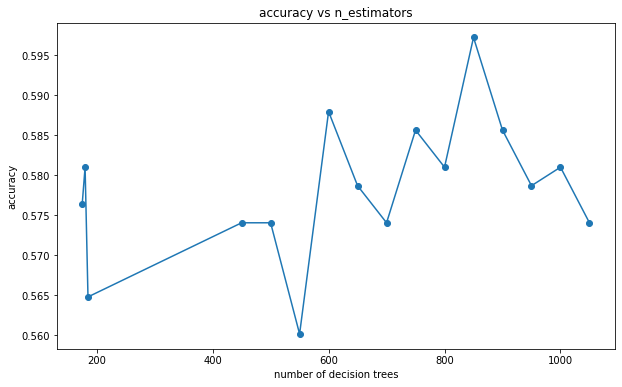

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rang,accuracy,marker='o')
plt.title('accuracy vs n_estimators')
plt.xlabel('number of decision trees')
plt.ylabel('accuracy')

Text(0, 0.5, 'f1_score')

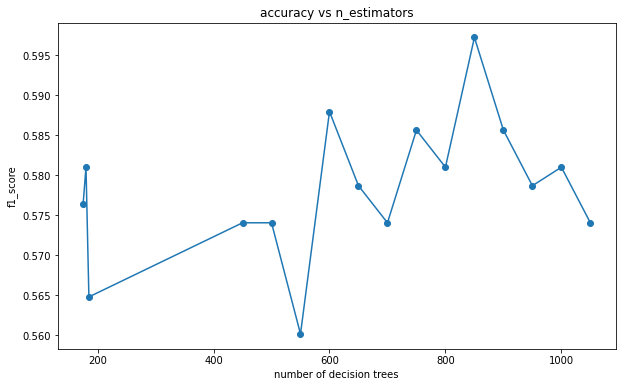

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(rang,f1_sc,marker='o')
plt.title('accuracy vs n_estimators')
plt.xlabel('number of decision trees')
plt.ylabel('f1_score')

**Classification Report for 600 trees**

In [ ]:
ran=RandomForestClassifier(n_estimators=850)
ran.fit(x_train,y_train)
y_pre=ran.predict(x_test)
repo=classification_report(y_test,y_pre)
repo

'              precision    recall  f1-score   support\n\n       angry       0.64      0.75      0.69        52\n        calm       0.60      0.84      0.70        62\n     disgust       0.45      0.52      0.48        50\n        fear       0.69      0.63      0.66        68\n       happy       0.75      0.42      0.53        65\n     neutral       1.00      0.19      0.33        36\n         sad       0.41      0.52      0.46        46\n    surprise       0.52      0.62      0.56        53\n\n    accuracy                           0.58       432\n   macro avg       0.63      0.56      0.55       432\nweighted avg       0.63      0.58      0.57       432\n'

In [ ]:
from sklearn.externals import joblib
joblib.dump(ran,'RandomForest1')


['RandomForest1']

In [ ]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,male
1310,-606.838260,41.041748,-11.410009,4.131662,1.025604,-9.173174,-13.336620,-11.059792,-13.268937,-2.631931,-5.779028,-6.511820,-0.337451,-4.706662,0.578357,-4.189630,-6.455082,-1.465634,-5.288839,-2.898625,-5.651615,-1.830752,-6.510298,-1.048766,-5.313154,1.752754,-1.457943,5.080515,4.959136,7.644027,3.411935,6.074453,5.259521,9.495665,8.617928,7.750981,2.702545,0.211587,-2.699101,1.275735,0
163,-390.708190,50.225868,-8.776139,8.600273,1.169839,6.304209,-10.398429,-14.762702,-10.148033,-11.793284,1.148270,-5.955765,-10.775265,0.008349,-4.112479,3.945144,-3.168240,-2.409276,0.212421,1.853178,-6.340788,2.191737,3.757475,4.083423,4.127128,10.850561,9.541688,9.657276,7.696363,9.983820,4.073217,7.908970,2.315087,5.384990,3.529313,6.590038,3.741135,1.212046,0.514703,3.384913,1
750,-612.226810,55.534683,-2.586208,3.764411,-1.896507,0.944498,-10.934214,-6.855750,-6.070243,-2.620811,-1.551221,-3.959143,-0.006650,-3.765554,-4.204239,1.435515,-6.742415,-1.008228,-0.027499,0.049736,-1.370874,-1.475714,-2.278236,0.145603,-2.416600,3.453723,-1.286172,1.536424,1.184540,1.896090,1.669508,2.639562,2.110655,4.062268,2.931784,5.767811,4.010366,3.036128,-0.086913,2.057256,1
615,-722.054080,64.638733,21.774611,22.492853,14.305911,10.725524,5.411258,3.890137,-0.413591,3.747181,9.582412,3.997384,-0.094183,1.190734,1.578052,3.705047,-1.384085,1.281086,-0.833824,0.829847,-3.662236,2.035487,-0.734935,-2.514382,-3.081019,3.098073,-2.609874,2.722171,-2.439584,2.147606,-0.319037,2.443358,-1.714282,0.563870,-2.906431,-0.650834,-2.095513,0.441655,-2.559512,-0.282268,1
783,-730.674990,44.721813,3.083029,7.163063,-9.467579,-2.078999,-7.826027,-9.398847,-2.861224,-4.241950,-3.608746,-4.971831,-3.388944,-3.015589,-5.990482,-2.633048,-3.308931,-3.097296,-3.520489,1.694006,-1.232014,1.422244,-0.366350,2.129159,-3.374170,2.127598,1.189677,2.601399,1.169098,2.010940,-0.063060,4.132984,2.404964,3.356027,0.820924,-0.493289,-1.346192,0.899382,0.798966,2.205822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,-394.901700,3.356052,-31.607748,-4.230312,-15.634807,-9.297086,-6.686167,-4.358272,-11.840693,-5.097898,-6.115689,-6.818303,1.415559,5.153676,11.835956,8.925575,3.541283,-3.744103,-6.443004,-1.849822,0.878381,3.304982,-4.858746,-4.151757,-3.019665,2.655953,-1.584408,0.021953,2.413443,5.211497,-2.158345,-0.829632,-1.981095,0.787389,-1.575191,0.276735,-1.659663,1.158245,-1.007163,1.303130,0
47,-592.736938,45.527775,-4.781423,8.121533,0.164883,-3.762319,-7.129310,-9.040398,-15.125155,-2.182029,-3.133765,-5.305816,-1.336441,-5.133504,-5.834976,0.430590,-9.720997,-2.910105,-1.664645,-3.090610,-7.599459,-2.034765,-6.855703,-4.685855,-4.097339,-2.841237,-3.302411,-1.858808,-4.076124,-0.874131,-2.980245,-2.052595,-3.312171,-2.822438,-3.895467,-0.863143,-0.622807,0.102171,-1.332708,1.521213,1
91,-604.896790,45.431297,-18.239319,12.399058,-6.779286,-6.250356,-4.895975,-12.205088,-3.925211,-3.793281,-6.648871,-1.508944,-8.131906,0.398158,-5.313779,-4.140010,-2.364646,-1.052449,-2.992733,2.075507,-1.995650,-2.738057,-1.842002,-1.344496,-2.238012,-2.840866,-1.660122,1.614210,1.628698,4.107387,-0.202707,3.046570,3.182538,5.379664,2.217612,2.850948,-1.053476,2.396409,-0.476663,0.283874,0
1404,-526.703550,24.508873,-11.056390,-1.752952,-12.660800,-10.282824,-15.516953,-9.752152,-9.132454,-3.155147,-10.525180,-2.637490,-4.545689,-3.964238,-2.287471,-4.485191,-6.508518,-1.217161,-3.611472,3.188899,9.065955,10.156910,8.777104,10.757162,3.277786,2.209010,-2.120974,3.253314,-0.189700,0.765907,-3.385807,-2.244253,-2.395995,0.568181,-1.730275,-1.175162,-1.082221,-0.973739,-2.098232,0.182294,0


In [ ]:
x_test.to_csv('x_test(modified)', index=False)

In [ ]:
y_test

1310         sad
163         fear
750     surprise
615         calm
783      neutral
          ...   
1053       angry
47      surprise
91         happy
1404        fear
379         calm
Name: emotion, Length: 432, dtype: object

In [ ]:
y_test.to_csv('y_test(modified)', index=False)

In [ ]:
x_test[0:1:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,male
1310,-606.83826,41.041748,-11.410009,4.131662,1.025604,-9.173174,-13.33662,-11.059792,-13.268937,-2.631931,-5.779028,-6.51182,-0.337451,-4.706662,0.578357,-4.18963,-6.455082,-1.465634,-5.288839,-2.898625,-5.651615,-1.830752,-6.510298,-1.048766,-5.313154,1.752754,-1.457943,5.080515,4.959136,7.644027,3.411935,6.074453,5.259521,9.495665,8.617928,7.750981,2.702545,0.211587,-2.699101,1.275735,0


In [ ]:
rf=joblib.load('RandomForest1')
rf.predict(x_test[1:2:])

array(['fear'], dtype=object)

In [ ]:
rf=joblib.load('RandomForest1(modified)')
rf.predict(x_test[1:2:])


array(['fear'], dtype=object)

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
accuracy=[]
f1_sc=[]
from sklearn.metrics import accuracy_score,f1_score,classification_report




In [ ]:
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  acc=accuracy_score(y_test,pred_i)
  f1=f1_score(y_test,pred_i,average='micro')
  accuracy.append(acc)
  f1_sc.append(f1)
  


  

**Classification Report for K=1**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred_y=knn.predict(x_test)
repo=classification_report(y_test,pred_y)
repo


'              precision    recall  f1-score   support\n\n       angry       0.56      0.69      0.62        62\n        calm       0.63      0.71      0.67        62\n     disgust       0.60      0.39      0.48        61\n        fear       0.65      0.52      0.57        64\n       happy       0.45      0.50      0.47        50\n     neutral       0.41      0.62      0.49        29\n         sad       0.50      0.33      0.40        54\n    surprise       0.43      0.50      0.46        50\n\n    accuracy                           0.53       432\n   macro avg       0.53      0.53      0.52       432\nweighted avg       0.54      0.53      0.53       432\n'

Text(0, 0.5, 'accuracy')

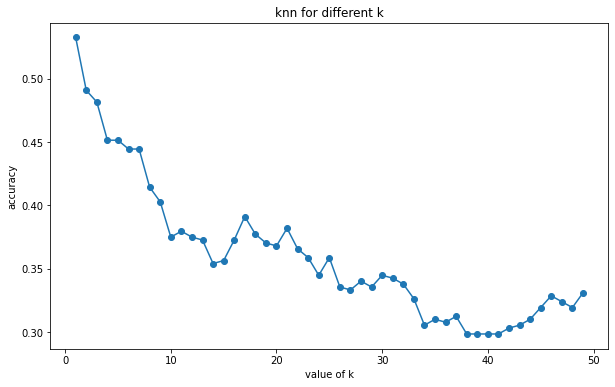

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,marker='o',)
plt.title('knn for different k')
plt.xlabel('value of k')
plt.ylabel('accuracy')

Text(0, 0.5, 'f1_score')

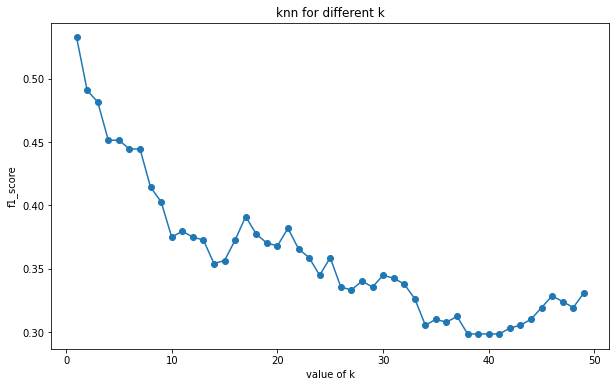

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),f1_sc,marker='o')
plt.title('knn for different k')
plt.xlabel('value of k')
plt.ylabel('f1_score')

In [ ]:
np.max(accuracy)

0.5254629629629629

In [ ]:
np.max(f1_sc)

0.5324074074074074

# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
pred_y=logmodel.predict(x_test)
accuracy=accuracy_score(y_test,pred_y)
repo=classification_report(y_test,pred_y)
repo


'              precision    recall  f1-score   support\n\n       angry       0.64      0.63      0.63        62\n        calm       0.34      0.35      0.35        62\n     disgust       0.40      0.39      0.40        61\n        fear       0.53      0.42      0.47        64\n       happy       0.30      0.36      0.33        50\n     neutral       0.22      0.07      0.11        29\n         sad       0.26      0.33      0.29        54\n    surprise       0.43      0.50      0.46        50\n\n    accuracy                           0.41       432\n   macro avg       0.39      0.38      0.38       432\nweighted avg       0.41      0.41      0.40       432\n'

In [ ]:
y1=pd.get_dummies(k['emotion'])
x1=x

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3)

In [ ]:
y_train

,angry,calm,disgust,fear,happy,neutral,sad,surprise
635,0,0,0,0,0,0,0,1
1080,0,1,0,0,0,0,0,0
1190,0,0,0,0,1,0,0,0
878,1,0,0,0,0,0,0,0
533,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
737,0,0,0,0,0,0,1,0
434,0,0,0,0,0,1,0,0
1015,1,0,0,0,0,0,0,0
189,0,1,0,0,0,0,0,0


In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,male
635,-629.783140,43.123867,9.048928,3.398721,1.090602,1.969862,-2.127581,-1.713175,-4.052580,-3.620589,0.497168,-1.507270,-4.016987,-0.835785,1.531741,-2.662995,-2.673482,0.436887,-2.218911,1.633033,-1.754727,3.523352,1.971362,1.275160,1.781008,3.635584,0.255496,5.565727,3.337954,6.736429,4.853843,3.760327,2.136954,3.117867,0.273329,1.375562,-0.019868,1.486995,0.077750,2.284148,1
1080,-703.776180,66.422493,19.787405,26.298813,13.855947,13.154053,-2.138130,-1.537710,-8.650709,1.659234,-1.119298,-1.666308,3.165314,1.933750,2.218111,9.268323,-3.493679,-4.936685,5.407801,-0.215000,-4.395263,3.237280,-4.755234,-0.331140,-1.324837,0.629650,0.191491,2.162553,0.736862,-0.488121,-1.797265,0.751827,-0.016024,3.770482,0.573755,2.405933,-1.497276,-1.448756,-1.203972,-0.383149,1
1190,-629.702090,37.794773,-2.825278,10.791224,-3.854709,-4.999341,-8.712160,-13.706725,-7.553161,-7.544427,-8.218740,-2.724651,-7.728480,-0.301191,-9.890334,-7.721768,-1.960961,-4.795727,-8.202565,-3.224894,-4.098701,-4.116481,-5.699875,-4.889587,-3.336436,-2.459472,-0.437932,4.596133,3.354974,6.649147,-0.139767,0.302276,-0.176922,1.814313,2.716546,3.677527,1.007411,0.470926,-1.182560,2.381484,0
878,-506.623630,43.635323,-8.160242,7.374547,3.810184,-6.737248,0.650186,-0.030673,-8.292025,3.579495,-4.776510,0.465207,0.257463,-1.395903,0.811043,-0.652354,-4.923165,-0.275649,-2.757282,-0.705781,-4.151546,0.835654,-4.214900,-1.423251,-3.215450,0.687283,-2.184034,3.021286,0.517511,3.294478,0.733462,1.856720,0.656125,2.969833,3.111288,4.312998,2.110445,3.702187,2.045640,2.354924,1
533,-635.147640,52.915707,3.443139,14.124011,7.903279,-3.983960,-3.017945,-2.698547,-1.958589,-3.081782,-4.902399,-1.285937,-3.077272,-2.425417,-2.094073,-1.565414,-0.079111,-2.343355,-2.862191,1.738060,-5.289891,-1.753157,-4.661418,-2.164179,-4.720994,-0.252817,-3.735819,-1.680224,-2.784392,-1.082017,-1.498751,-1.030046,-3.291802,-0.982832,-1.500763,1.089645,-0.938684,-0.034760,-1.819937,0.010101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,-711.099730,65.604034,9.528098,10.136963,7.093717,2.291309,-5.780896,-5.318743,-3.831959,0.525093,0.060666,-3.192858,4.684866,1.628521,-1.091571,2.894091,-4.824970,0.245326,1.682976,-1.741122,-1.748995,-0.346421,-2.731997,-0.975029,-2.344214,2.019133,-1.617487,0.165365,-0.597314,1.061977,-1.432259,-0.076842,-2.402023,-0.704119,-0.325146,1.184307,-1.492949,-1.667650,-3.503116,0.137783,1
434,-689.159970,63.491478,8.351000,22.200525,6.846424,2.594155,5.505468,-8.571800,2.373426,-1.314107,1.931137,-3.506349,0.387826,3.429456,-1.944753,0.837237,-0.360498,3.340947,0.022798,3.239629,-1.752167,3.351718,-1.627210,3.030479,0.293225,2.668490,2.793834,3.069840,2.536320,2.404301,0.993920,2.074488,2.410437,6.200538,5.286067,5.778206,3.509970,6.268370,4.268157,4.960762,0
1015,-438.917050,43.175850,-18.981075,13.520919,5.405323,-2.433411,0.792978,-5.701658,-13.258009,3.615232,-4.726579,-5.409281,4.466079,-4.183963,-3.880199,1.404451,-4.560650,0.599897,-4.040880,-0.984200,-2.598222,1.807779,-2.921492,-1.595618,-1.468023,2.257971,-1.601363,3.606600,-1.629714,2.706997,0.608536,3.972048,5.358462,4.368207,0.772147,2.629372,3.867631,3.933641,2.834580,4.025853,1
189,-667.884583,49.005501,-6.774004,2.245953,-10.348080,-5.679419,-15.532805,-14.174775,-9.471384,-4.799671,-8.576760,-11.375028,-5.027174,-4.511900,-10.581879,-2.440510,-6.029157,-7.378552,-6.787080,-2.868386,-9.369150,-2.911598,-7.192466,-0.642097,-5.753550,-1.106911,-1.696642,1.665795,3.820580,5.817229,5.469246,8.151162,4.299758,4.496807,2.519174,5.262311,1.017942,2.455607,0.116031,-0.645017,0


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
classifier=Sequential()
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu',input_dim=41))
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='Adamax',loss='categorical_crossentropy',metrics=['Accuracy'])



In [ ]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
68/68 [==============================] - 1s 9ms/step - loss: 41.7986 - accuracy: 0.0943 - val_loss: 4.9196 - val_accuracy: 0.1062
Epoch 2/100
68/68 [==============================] - 0s 5ms/step - loss: 4.4654 - accuracy: 0.1112 - val_loss: 3.4459 - val_accuracy: 0.1149
Epoch 3/100
68/68 [==============================] - 0s 5ms/step - loss: 3.6372 - accuracy: 0.1131 - val_loss: 4.7409 - val_accuracy: 0.1149
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 3.7040 - accuracy: 0.1123 - val_loss: 3.2772 - val_accuracy: 0.1119
Epoch 5/100
68/68 [==============================] - 0s 5ms/step - loss: 3.4911 - accuracy: 0.1135 - val_loss: 3.3285 - val_accuracy: 0.1141
Epoch 6/100
68/68 [==============================] - 0s 5ms/step - loss: 3.2514 - accuracy: 0.1138 - val_loss: 2.8260 - val_accuracy: 0.1100
Epoch 7/100
68/68 [==============================] - 0s 5ms/step - loss: 3.2209 - accuracy: 0.1140 - val_loss: 4.1125 - val_accuracy: 0.1130
Epoch 8/100
